In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle as CirclePatch

In [2]:
# # --- Data ---
# circles = [
#     ((9.5, 30.5), 3.5),
#     ((18, 24), 5),
#     ((4, 23), 3),
#     ((12.5, 17), 3),
#     ((30, 17), 3),
#     ((4, 11), 3),
#     ((16, 9), 3),
#     ((7.5, 4), 2.5),
# ]

# points = [
#     (28, 18),
#     (9, 17),
#     (18, 9.5),
#     (18, 20),
#     (11, 5),
#     (14, 30.5),
#     (40, 40),
# ]


# ######## Círculos concéntricos

# circles = [
#     ((1, 1), 1),
#     ((1,1),2)
#     ]

# points = [
#     (1,1)
#     ]

####### Círculos tangentes

# circles = [
#     ((0, 0), 1),
#     ((1, 0), 2),
#     ((2, 0), 3),
#     ((3, 0), 4),
#     ((8, 0), 1)
#     ]

# points = [
#     (0,0)
#     ]

# circles = [
#     ((0, 0), 1),
#     ((-1, 0), 2),
#     ((-2, 0), 3),
#     ((-3, 0), 4),
#     ((-8, 0), 1)
#     ]

# points = [
#     (0,0)
#     ]

# circles = [
#     # ((0, 4), 2),
#     ((2, 2), 2),
#     ((0, 4), 2)
#     ]

# points = [
#     (0,0)
#     ]

# circles = [
#     ((9.5, 30.5), 3.5), 
#     ((11, 30.5), 3.5),    
#         ]

# points = [
#     (40,40)
#         ]

# circles = [
#     ((4, 23), 3), 
#     ((7, 17), 4.5) 
#         ]

# points = [
#     (40,40)
#         ]

# --- Data ---
circles = [
    ((9.5, 30.5), 3.5),    
    ((11, 30.5), 3.5),     
    ((18, 24), 5),         
    ((4, 23), 3),
    ((4, 17), 4),          
    ((7, 17), 4.5),        
    ((12.5,17), 3),        
    ((18, 15), 6),         
    ((27,19),3),           
    ((30,17),3),           
    ((4, 11), 3),          
    ((12, 9), 2),          
    ((16,9),3),            
    ((6, 4),  3),          
    ((7.5, 4), 2.5),       
    ((18, 5), 5)           
        ]



points = [
    # (28, 18), 
    # (9, 17), 
    # (18, 9.5), 
    # (18, 20), 
    # (11, 5), 
    # (14, 30.5),
    (40,40)
        ]

In [3]:
# Q:  [
#     (-99.57475914176491, 19.021688, 'left', {2}),
#     (-99.22303214176492, 19.710188, 'left', {1}),
#     (-99.2220149905056, 19.670542517196886, 'intersection', {1, 2}),
#     (-99.1025, 19.26320872, 'input', {4}),
#     (-98.964944, 19.225452, 'input', {3}),
#     (-98.929377, 19.208416, 'input', {8}),
#     (-98.861296, 19.157003, 'input', {2}),
#     (-98.769811, 19.128685, 'input', {1}),
#     (-98.63503388, 20.01754366, 'input', {7}),
#     (-98.582947, 19.920949, 'input', {9}),
#     (-98.570476, 19.588526, 'input', {5}),
#     (-98.5522711, 19.78507842, 'input', {6}),
#     (-98.02949800949442, 19.061333482803114, 'intersection', {1, 2}),
#     (-98.02848085823508, 19.021688, 'right', {2}),
#     (-97.67675385823509, 19.710188, 'right', {1})
# ]

circles = [
   # , 
    ((-98.449893, 19.710188), 0.7731391417649149),
     ((-98.80162, 19.021688), 0.7731391417649149)
        ]

points = [
    # (-98.769811, 19.128685),
    # (-98.861296, 19.157003),
    # (-98.964944, 19.225452),
    # (-99.1025, 19.26320872),
    # (-98.570476, 19.588526),
    # (-98.5522711, 19.78507842),
    # (-98.63503388, 20.01754366),
    # (-98.929377, 19.208416),
    (-98.582947, 19.920949)
        ]

(-99.57475914176491+98.02848085823508)/2
-99.57475914176491+0.7731391417649149
(-99.22303214176492+97.67675385823509)/2
-99.22303214176492+0.7731391417649149

-98.449893

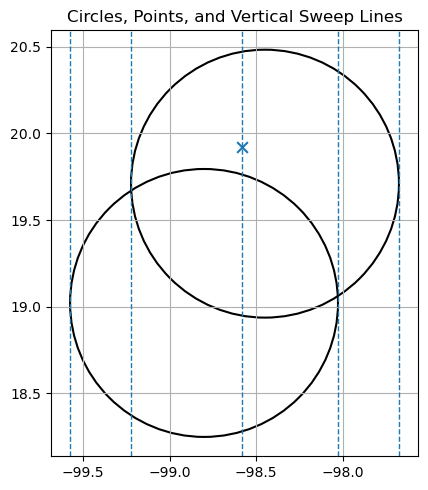

In [4]:
def plot_circles_points_with_verticals(circles, points, figsize=(3.5, 2)):
    fig, ax = plt.subplots(figsize=figsize)

    # Collect verticals: points' x and circle endpoints (cx±r)
    vxs = set(x for x, _ in points)
    for (cx, cy), r in circles:
        vxs.add(cx - r)
        vxs.add(cx + r)

    # Circles
    for ((cx, cy), r) in circles:
        ax.add_patch(CirclePatch((cx, cy), r, fill=False, linewidth=1.5))

    # Points
    if points:
        px, py = zip(*points)
        ax.scatter(px, py, marker="x", s=60, linewidths=1.5)

    # Dashed verticals
    for x in sorted(vxs):
        ax.axvline(x, linestyle="--", linewidth=1)

    # Bounds
    xs = list(px) + [cx - r for (cx, cy), r in circles] + [cx + r for (cx, cy), r in circles] if points else \
         [cx - r for (cx, cy), r in circles] + [cx + r for (cx, cy), r in circles]
    ys = list(py) + [cy - r for (cx, cy), r in circles] + [cy + r for (cx, cy), r in circles] if points else \
         [cy - r for (cx, cy), r in circles] + [cy + r for (cx, cy), r in circles]

    if xs and ys:
        xmin, xmax = min(xs), max(xs)
        ymin, ymax = min(ys), max(ys)
        pad = 0.05 * max(xmax - xmin, ymax - ymin) or 1.0
        ax.set_xlim(xmin - pad, xmax + pad)
        ax.set_ylim(ymin - pad, ymax + pad)

    ax.set_aspect("equal", adjustable="box")
    ax.set_title("Circles, Points, and Vertical Sweep Lines")
    ax.grid(True)
    fig.tight_layout()
    plt.show()

# Example call:
plot_circles_points_with_verticals(circles, points, figsize=(5, 5))


In [5]:
# from sweepcircles import *
from sweepcircles import *
sweep_circles(circles, points, debug=True)

Antes de iniciar:
Q:  [
    (-99.57475914176491, 19.021688, 'left', {2}),
    (-99.22303214176492, 19.710188, 'left', {1}),
    (-98.582947, 19.920949, 'input', {1})
]
Línea de barrido = {'x': -99.57475915176491, 'active': set(), 
'conditions': [
    {'in': set(), 'out': set(), 'ineq': []}
]}
Ac (matriz):
[0, 0]
[0, 0]
#####     Point (-99.57475914176491, 19.021688) is a LEFT endpoint of circle {2}     #####
Círculo izquierdo con centro en ( -98.80162 , 19.021688 ) y radio  0.7731391417649149
Conditions {'x': -99.57475914176491, 'active': set(), 'conditions': [{'in': set(), 'out': set(), 'ineq': []}], 'seen_inputs': set()}
base {'in': set(), 'out': set(), 'ineq': []}
down {'in': set(), 'out': {2}, 'ineq': [('y', '<', (2, 'y_low'))]}
middle {'in': {2}, 'out': set(), 'ineq': []}
up {'in': set(), 'out': {2}, 'ineq': [('y', '>', (2, 'y_high'))]}
check intersections in circles [2]
Q:  [
    (-99.57475914176491, 19.021688, 'left', {2}),
    (-99.22303214176492, 19.710188, 'left', {1}),
    (

[[1, 0], [0, 0]]

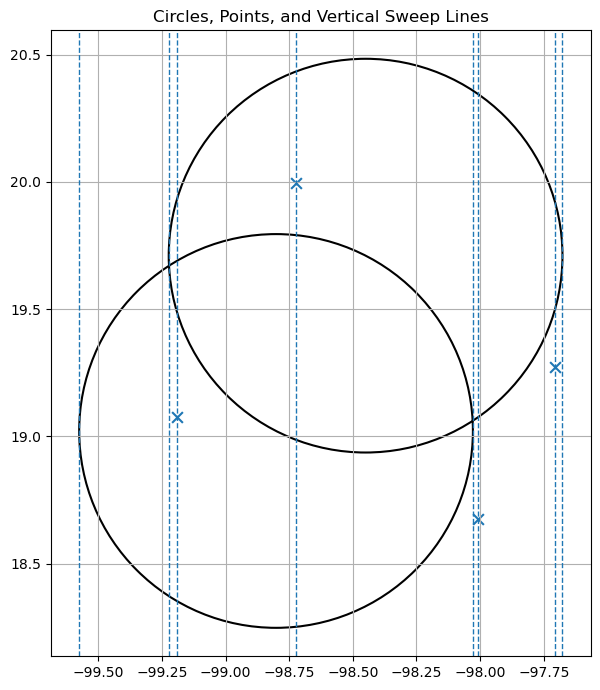

In [6]:
# el maximo entre .1 del radio del ciculo involucrado m[as chico o
# la distancia .5 la distancia entre ese punto y el punto que sigue

points = [
    ( -99.1914396975802 , 19.07506847161428 ),
    ( -98.72160698619945 , 19.994758520389727 ),
    ( -97.70507075089598 , 19.2715309780559 ),
    ( -98.00967526809288 , 18.675272487550323 )
    ]

plot_circles_points_with_verticals(circles, points, figsize=(7, 7))